<a href="https://colab.research.google.com/github/Pooooj/Predicting-house-price-in-boston-/blob/main/Predicting_house_price_in_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#Mount the drive and load the data set
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Boston housing prediction/boston.csv')

Mounted at /content/drive


In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [13]:
#Shape of the data
data.shape

(506, 13)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [15]:
#Summary statistics of numerical data
data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [17]:
#Replacing Chas with 1 as yes and No as 0
data['CHAS'] = data['CHAS'].replace({0: 'No', 1: 'Yes'})
data.head()


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,No,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,No,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,No,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,No,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,No,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [18]:
#Splitting the dataset dependent variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']



In [19]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()


,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_Yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,False
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,False
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,False
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,False
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,False


In [24]:
#Adds the constant term to dataset
X = sm.add_constant(X)
#splitting the dataset to train and test data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# Convert 'CHAS_Yes' column in X_train and X_test to numeric (if they exist)
if 'CHAS_Yes' in X_train.columns:
    X_train['CHAS_Yes'] = X_train['CHAS_Yes'].astype(int)
if 'CHAS_Yes' in X_test.columns:
    X_test['CHAS_Yes'] = X_test['CHAS_Yes'].astype(int)

# Convert 'CHAS_No' column in X_train and X_test to numeric (if they exist)
if 'CHAS_No' in X_train.columns:
    X_train['CHAS_No'] = X_train['CHAS_No'].astype(int)
if 'CHAS_No' in X_test.columns:
    X_test['CHAS_No'] = X_test['CHAS_No'].astype(int)

#Make the linear model using statsmodels OLS and print the model summary
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           2.38e-83
Time:                        21:25:03   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0

In [25]:
#Linear Regression No multicolinearity using VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

checking_vif(X_train)


,feature,VIF
0,const,535.372593
1,CRIM,1.924114
2,ZN,2.743574
3,INDUS,3.999538
4,NX,4.396157
5,RM,1.860950
6,AGE,3.150170
7,DIS,4.355469
8,RAD,8.345247
9,TAX,10.191941


In [26]:
#Dropping VIP score greater than 5 also checking the RMSE and R-square for over fitting and accracy
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [27]:
col_list = ["RAD", "TAX"]

res = treating_multicollinearity(X_train, y_train, col_list)
res


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,TAX,0.693267,4.997394
1,RAD,0.687451,5.044546


In [28]:
col_to_drop = "TAX"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  TAX


,feature,VIF
0,const,532.025529
1,CRIM,1.923159
2,ZN,2.483399
3,INDUS,3.270983
4,NX,4.361847
5,RM,1.857918
6,AGE,3.149005
7,DIS,4.333734
8,RAD,2.942862
9,PTRATIO,1.909750


In [29]:
#Dropping high p values
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'CRIM', 'ZN', 'NX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'CHAS_Yes']


In [30]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [31]:
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     90.34
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           4.34e-85
Time:                        22:16:09   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     344   BIC:                             2190.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8196      6.092      8.014      0.0

In [33]:
#Test of Linearity and Independence
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
13,20.4,19.428323,0.971677
61,16.0,17.881985,-1.881985
377,13.3,18.672515,-5.372515
39,30.8,31.377965,-0.577965
365,27.5,16.946181,10.553819


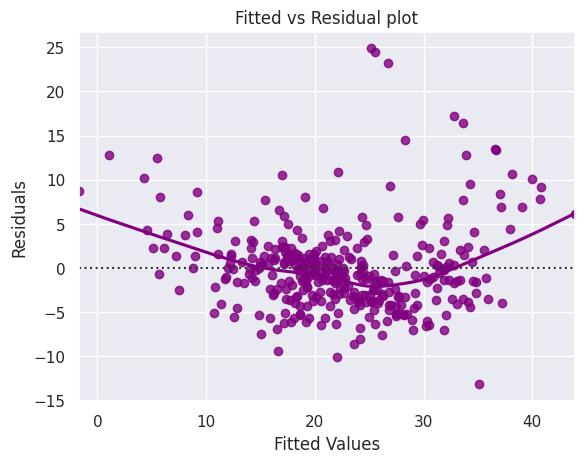

In [34]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

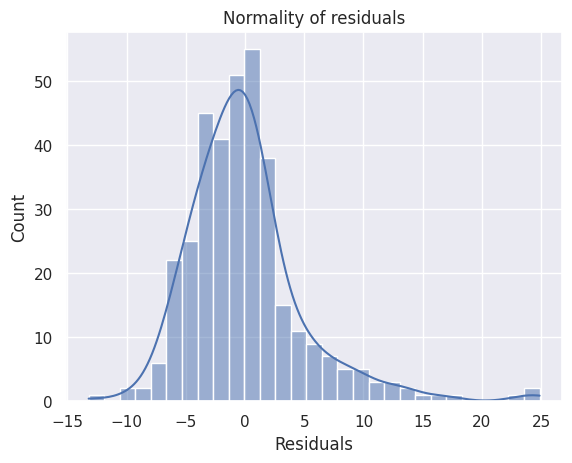

In [35]:
#Test for Normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

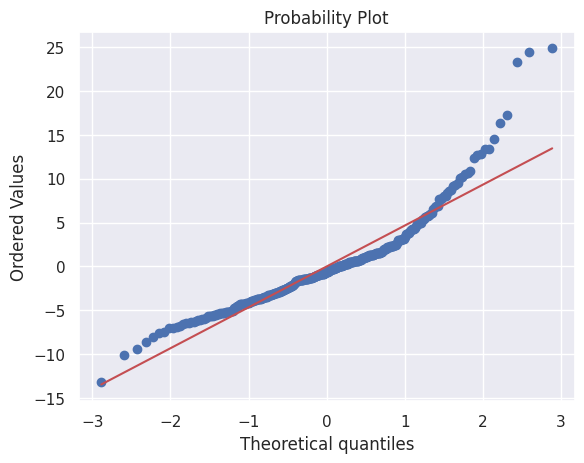

In [36]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [37]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8942404983171556, pvalue=5.916196239196863e-15)

In [38]:
#testing for Homosceadicity to check if p value is >0.05
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.2224599068220499), ('p-value', 0.0976863004418288)]

In [39]:
#final model summary
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     90.34
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           4.34e-85
Time:                        22:30:12   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     344   BIC:                             2190.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8196      6.092      8.014      0.0